## Effect of Twitter on the stock market

* This dataset contains over 3 million unique tweets with their information such as tweet id, author of the tweet, post date, the text body of the tweet, and the number of comments, likes, and retweets of tweets matched with the related company.
* we will find if the tweets related to a company affect its stock price

### Data cleaning and organising

#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
from pylab import rcParams

#### taking a look at the data available

In [2]:
comp=pd.read_csv('datasets/effect of twitter/Company.csv')
comp_tweet=pd.read_csv('datasets/effect of twitter/Company_Tweet.csv')
tweet=pd.read_csv('datasets/effect of twitter/Tweet.csv')

In [3]:
comp

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [4]:
comp_tweet.head(5)

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [5]:
tweet.head(5)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


#### merging datasets
merging tweet and comp_tweet to identify the company in the tweet dataset

In [6]:
tweets=pd.merge(tweet,comp_tweet,on='tweet_id',how='inner')
tweets.head(5)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


#### formatting post_date column

In [7]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [8]:
tweets['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

removing post date colum

In [9]:
tweets.drop('post_date',axis=1,inplace=True)

#### information about our dataset 

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   writer         object        
 2   body           object        
 3   comment_num    int64         
 4   retweet_num    int64         
 5   like_num       int64         
 6   ticker_symbol  object        
 7   date           datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 264.7+ MB


#### dealing with null values

checking for null values

In [11]:
tweets.isna().sum()

tweet_id             0
writer           55919
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

replacing null values in writer column to anonymous

In [12]:
tweets['writer'] = tweets['writer'].fillna('anonymous')

#### how many tweets were made about each company

In [13]:
tweets.ticker_symbol.value_counts()

ticker_symbol
AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: count, dtype: int64

* GOOGL is with voting rights and GOOG is without. 
* We only consider stocks with voting rights for our analysis 

#### time-period of tweets

In [14]:
start_date=min(tweets['date'])
end_date=max(tweets['date'])
print(start_date,'\n',end_date)

2015-01-01 00:00:00 
 2019-12-31 00:00:00


* the first tweet was recorded on 1-1-2015 and the last was on 31-12-2019
* we have 5 years worth of data
* these are our start and end dates

#### creating seperate dataframes for each company

In [15]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL']

#### getting stock prices dataset

In [16]:
!pip install yfinance -q

In [17]:
import yfinance as yf  # yahoo finance

TESLA

In [18]:
tsla_stock = yf.Ticker('TSLA')

In [19]:
tsla_stock = tsla_stock.history(start= min(tsla['date']), end=max(tsla['date']))

In [20]:
tsla_stock.index=tsla_stock.index.date
tsla_stock['date']=tsla_stock.index
tsla_stock['date']=tsla_stock['date'].apply(pd.to_datetime)
tsla_stock.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0,2015-01-02
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0,2015-01-05


APPLE

In [21]:
aapl_stock = yf.Ticker('AAPL')
aapl_stock = aapl_stock.history(start= min(aapl['date']), end=max(aapl['date']))
aapl_stock.index=aapl_stock.index.date
aapl_stock['date']=aapl_stock.index
aapl_stock['date']=aapl_stock['date'].apply(pd.to_datetime)
aapl_stock.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
2015-01-02,24.861952,24.873113,23.960235,24.402166,212818400,0.0,0.0,2015-01-02
2015-01-05,24.170045,24.250396,23.527237,23.714722,257142000,0.0,0.0,2015-01-05


AMAZON

In [22]:
amzn_stock = yf.Ticker('AMZN')
amzn_stock = amzn_stock.history(start=min(amzn['date']), end=max(amzn['date']))
amzn_stock.index = amzn_stock.index.date
amzn_stock['date'] = amzn_stock.index
amzn_stock['date'] = amzn_stock['date'].apply(pd.to_datetime)
amzn_stock.head(2)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
2015-01-02,15.6290,15.7375,15.3480,15.4260,55664000,0.0,0.0,2015-01-02
2015-01-05,15.3505,15.4190,15.0425,15.1095,55484000,0.0,0.0,2015-01-05


GOOGLE

In [23]:
googl_stock = yf.Ticker('GOOGL')
googl_stock = googl_stock.history(start=min(googl['date']), end=max(googl['date']))
googl_stock.index = googl_stock.index.date
googl_stock['date'] = googl_stock.index
googl_stock['date'] = googl_stock['date'].apply(pd.to_datetime)
googl_stock.head(2)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
2015-01-02,26.629999,26.790001,26.393999,26.477501,26480000,0.0,0.0,2015-01-02
2015-01-05,26.357500,26.399500,25.887501,25.973000,41182000,0.0,0.0,2015-01-05


MICROSOFT

In [24]:
msft_stock = yf.Ticker('MSFT')
msft_stock = msft_stock.history(start=min(msft['date']), end=max(msft['date']))
msft_stock.index = msft_stock.index.date
msft_stock['date'] = msft_stock.index
msft_stock['date'] = msft_stock['date'].apply(pd.to_datetime)
msft_stock.head(2)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
2015-01-02,40.219168,40.874258,40.115733,40.305363,27913900,0.0,0.0,2015-01-02
2015-01-05,39.969195,40.279502,39.865761,39.934719,39673900,0.0,0.0,2015-01-05


## ANALYSIS

### To find out if amount of tweets affects the volume traded of the company

#### defining fuction for plotting

In [25]:
def tweet_vol(tweet,stock,title):
    md2=pd.merge(tweet, stock, on='date', how='inner')
    tweet_volume =md2.groupby('date').size().rolling(30).mean().dropna()
    stock_volume =stock['Volume'].rolling(30).mean().dropna()
    corr1=tweet_volume.corr(stock_volume)
    print("coorelation is: ",corr1)
    fig, ax = plt.subplots()
    ax.plot(tweet_volume,color='orange',label='tweets')
    ax2 = ax.twinx()
    ax2.plot(stock_volume,label='stock')
    plt.title(title)
    ax.set_xlabel('year')
    ax.set_ylabel('tweet vol')
    ax2.set_ylabel('stock vol')
    ax.legend() 
    ax2.legend(loc='upper left')
    plt.show()

coorelation is:  0.8929661769768085


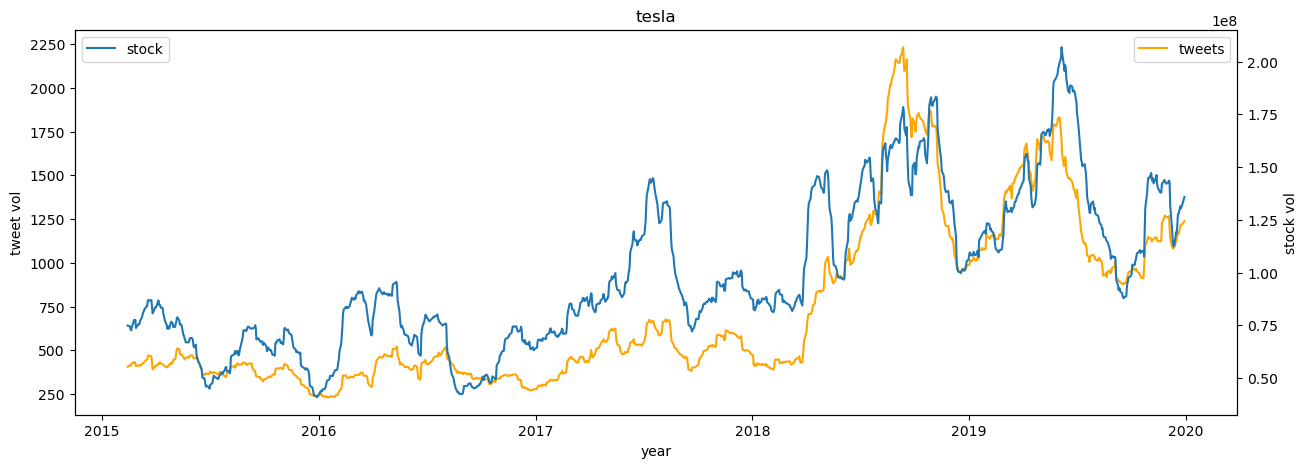

In [26]:
plt.rcParams['figure.figsize'] = (15, 5)
tweet_vol(tsla,tsla_stock,'tesla')

coorelation is:  0.659043528736164


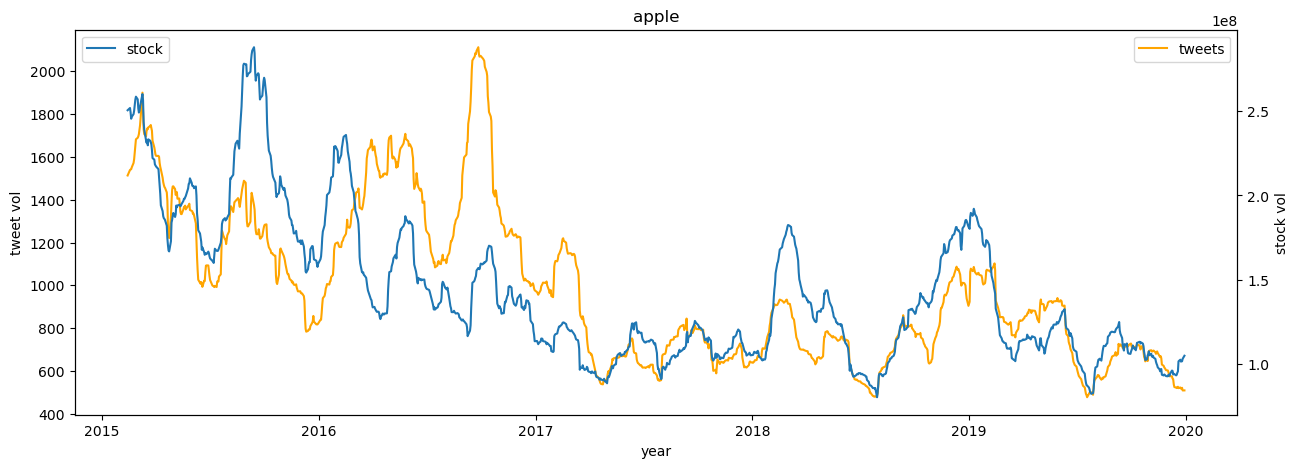

In [27]:
tweet_vol(aapl,aapl_stock,'apple')

coorelation is:  0.5701501221341587


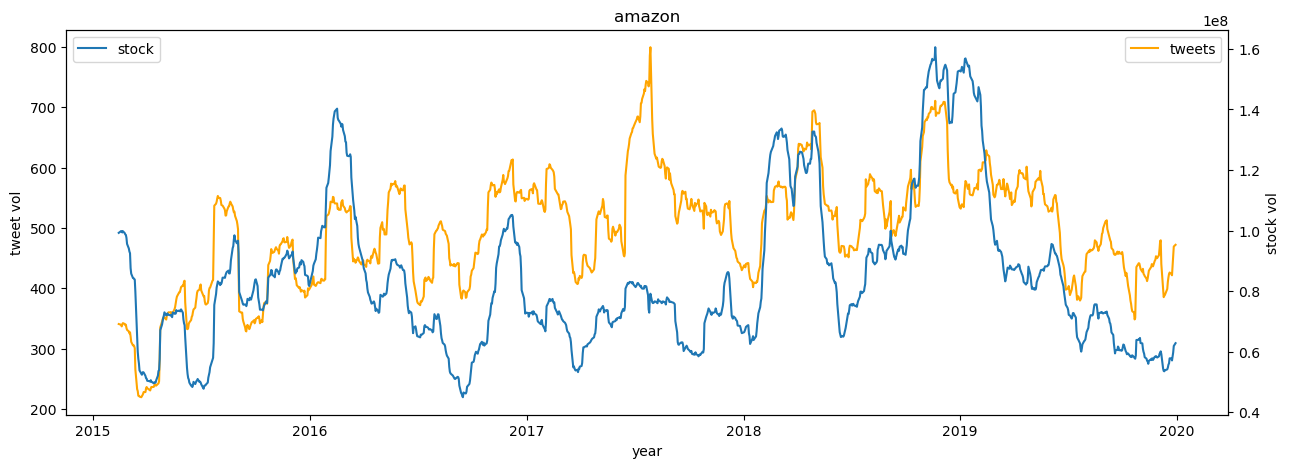

In [28]:
tweet_vol(amzn,amzn_stock,'amazon')

coorelation is:  0.5479154637798701


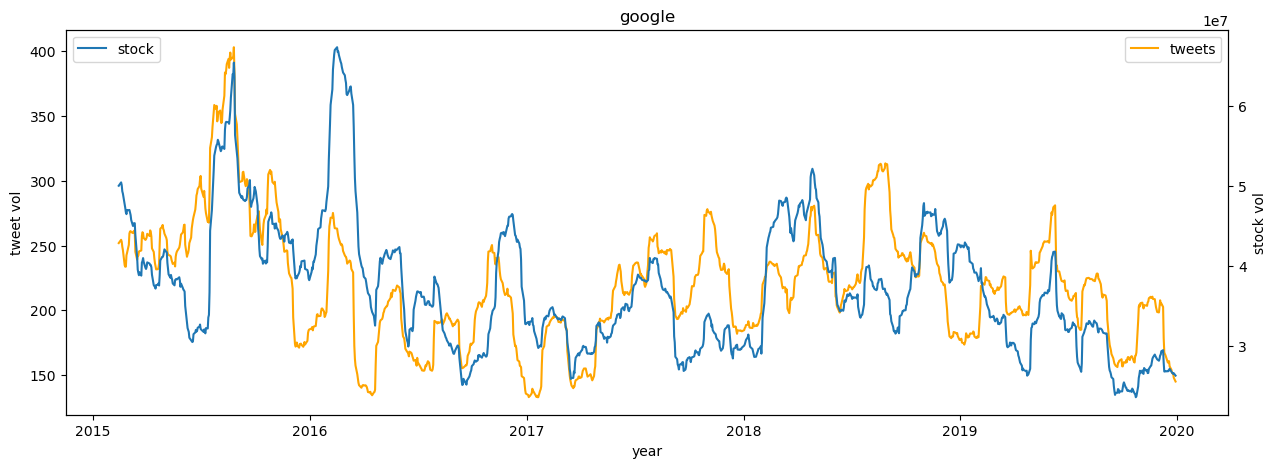

In [29]:
tweet_vol(googl,googl_stock,'google')

coorelation is:  -0.14175033054345001


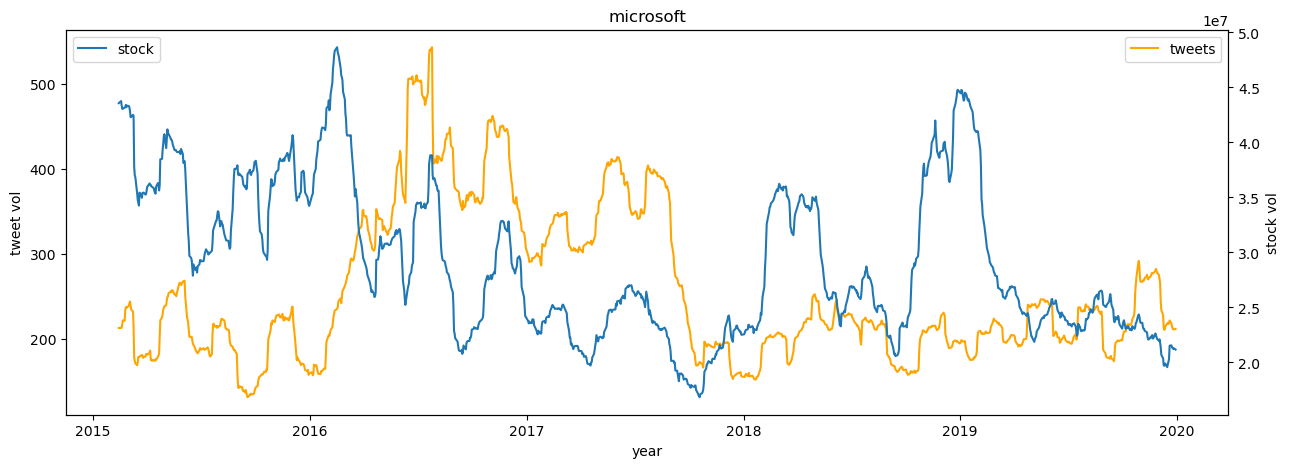

In [30]:
tweet_vol(msft,msft_stock,'microsoft')

#### interpretation
* the sheer volume of tweets has a correlation with the trade volume.
* all compaines except for microsoft have a moderate positive correlation between volume of tweets and stocks 

## Sentinent Analysis

### classifying positive and negative tweets and their affect on stock prices

we choose the top 1,00,000 tweets based on the number of likes and evalute the sentiment on the basis of those.

In [31]:
def most_liked_tweets(twee):
    twee = twee.sort_values(by=['like_num'], ascending=False)
    twee=twee.iloc[:100000]
    return twee  

In [32]:
tsla_ml=most_liked_tweets(tsla)
aapl_ml=most_liked_tweets(aapl)
amzn_ml=most_liked_tweets(amzn)
googl_ml=most_liked_tweets(googl)
msft_ml=most_liked_tweets(msft)

#### text processing


removing hyperlinks, special charecters and numbers and converting to lower case

In [33]:
import nltk                             
import random  
import re                     
import string


In [34]:
def remove_special_character(tweet):
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    tweet = re.sub(r'#', '', tweet)
    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet=tweet.lower()
    return tweet

executing function 

In [35]:
tsla_ml.loc[:, "body"] = tsla_ml['body'].apply(lambda tweet: remove_special_character(tweet))

In [36]:
aapl_ml.loc[:, "body"] = aapl_ml['body'].apply(lambda tweet: remove_special_character(tweet))

In [37]:
amzn_ml.loc[:, "body"] = amzn_ml['body'].apply(lambda tweet: remove_special_character(tweet))

In [38]:
googl_ml.loc[:, "body"] = googl_ml['body'].apply(lambda tweet: remove_special_character(tweet))

In [39]:
msft_ml.loc[:, "body"] = msft_ml['body'].apply(lambda tweet: remove_special_character(tweet))

#### sentinet analysis

In [40]:
!pip install afinn -q

AFINN is a list of words rated with an integer between minus five (negative) and plus five (positive) that is used for sentiment analysis

In [41]:
from afinn import Afinn
afinn = Afinn()

In [42]:
tsla_ml['score'] =  tsla_ml['body'].apply(lambda tweet: afinn.score(tweet))

In [43]:
aapl_ml['score'] =  aapl_ml['body'].apply(lambda tweet: afinn.score(tweet))

In [44]:
amzn_ml['score'] =  amzn_ml['body'].apply(lambda tweet: afinn.score(tweet))

In [45]:
msft_ml['score'] =  msft_ml['body'].apply(lambda tweet: afinn.score(tweet))

In [46]:
googl_ml['score'] =  googl_ml['body'].apply(lambda tweet: afinn.score(tweet))

#### visualsing the tweet scores of each company

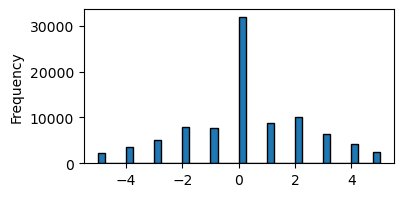

In [63]:
rcParams['figure.figsize'] = (4, 2)  
tsla_ml.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black')
plt.show()

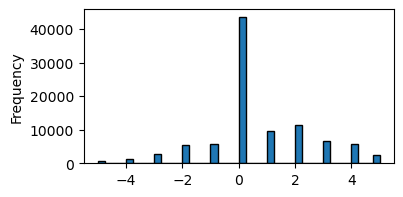

In [64]:
aapl_ml.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black')
plt.show()

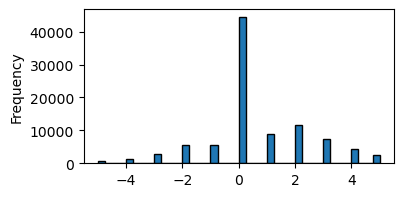

In [48]:
amzn_ml.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black')
plt.show()

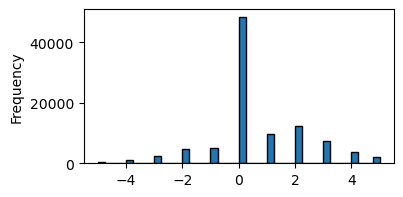

In [54]:
googl_ml.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black')
plt.show()

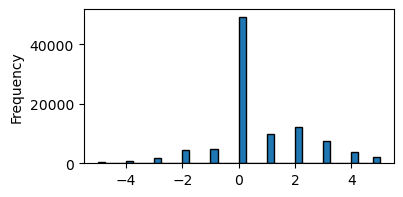

In [55]:
msft_ml.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black')
plt.show()

#### sentiment over time vs stock price

In [73]:
def sentiment_overtime(tweets1,stock,title):
    md2=pd.merge(tweets1, stock, on='date', how='inner')
    visual= md2.groupby('date')['score'].mean().shift(-1).rolling(30).mean().dropna()
    fig, ax = plt.subplots()
    ax.plot(visual,color='orange',label='tweets sentiment')
    ax2 = ax.twinx()
    ax2.plot(stock['Close'],label='stock price')
    ax.set_xlabel('year')
    ax.set_ylabel('tweet sentiment')
    ax2.set_ylabel('stock price')
    ax.legend() 
    ax2.legend(loc='upper left')
    plt.title(title)
    plt.show()
    

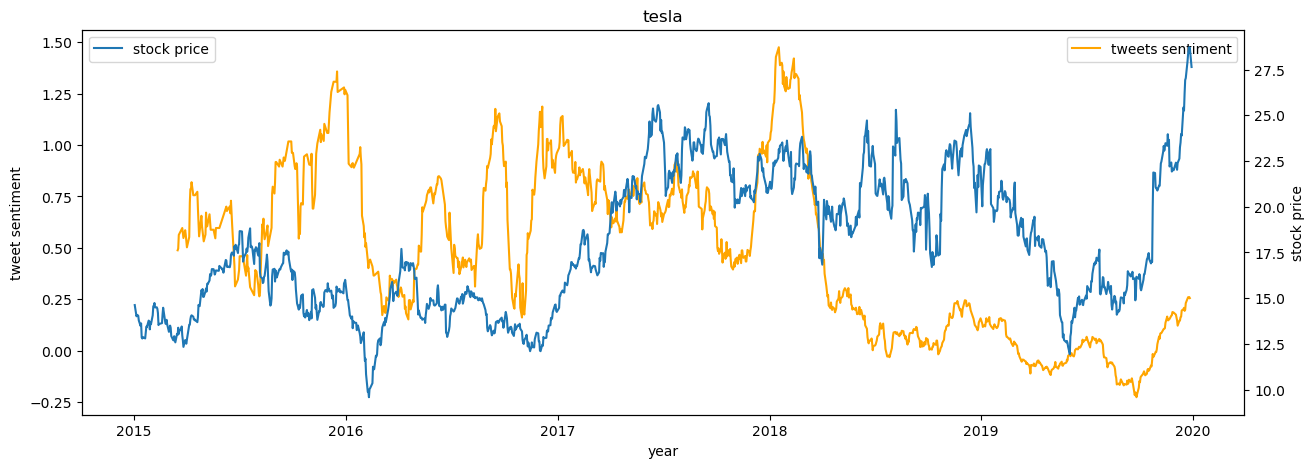

In [74]:
rcParams['figure.figsize'] = (15, 5)  
sentiment_overtime(tsla_ml,tsla_stock,'tesla')

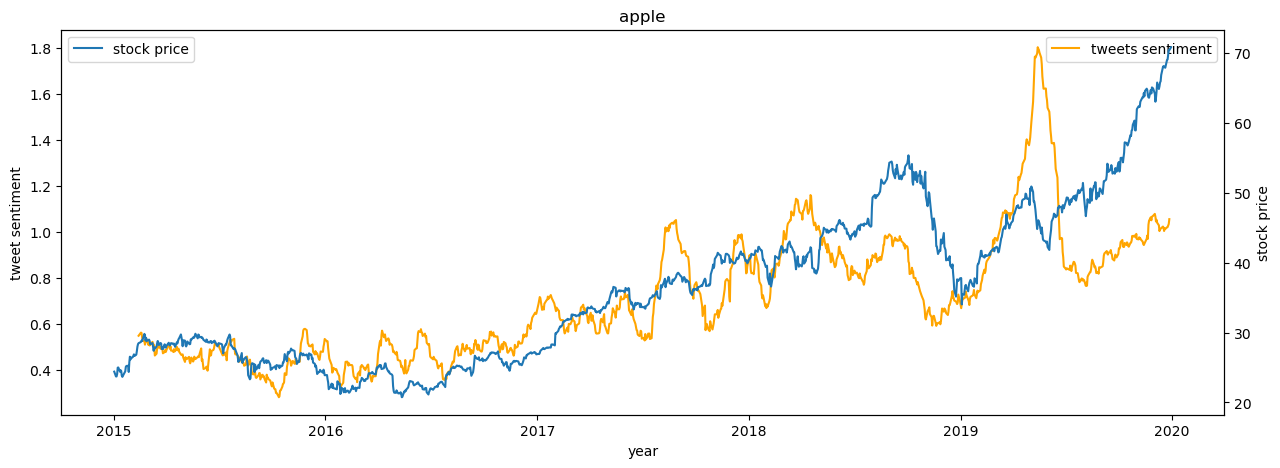

In [77]:
sentiment_overtime(aapl_ml,aapl_stock,'apple')

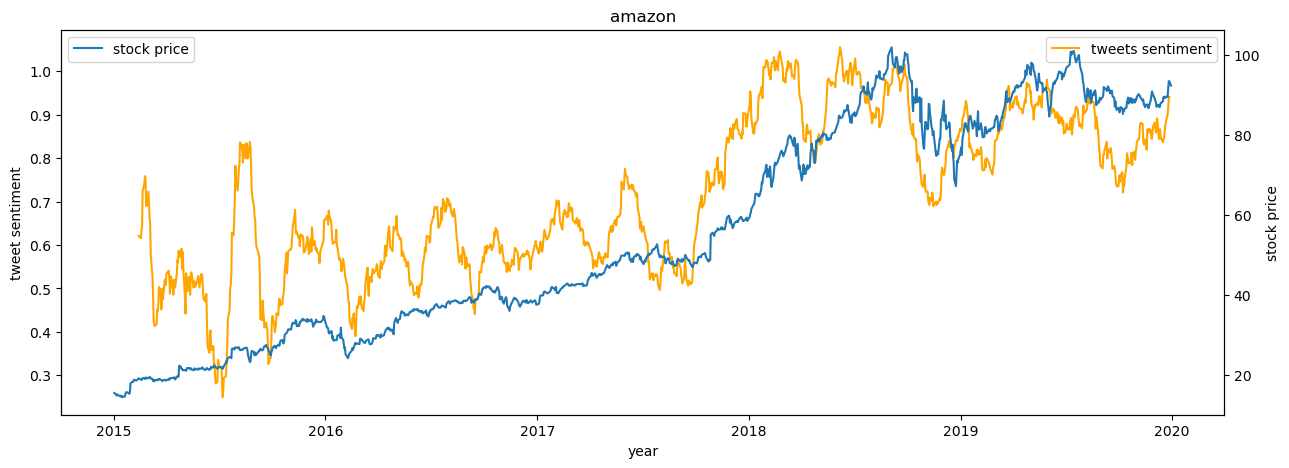

In [78]:
sentiment_overtime(amzn_ml,amzn_stock,'amazon')

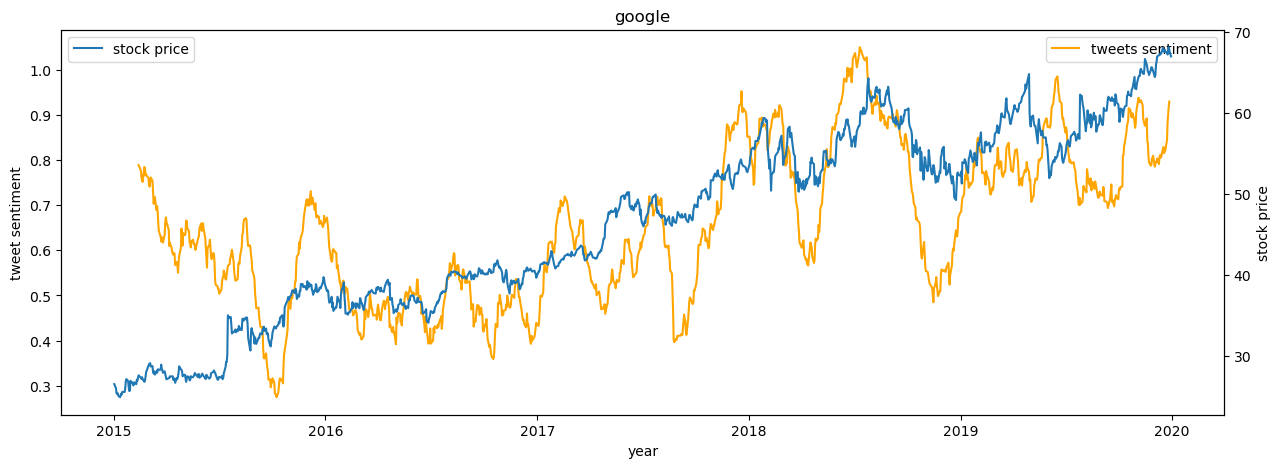

In [79]:
sentiment_overtime(googl_ml,googl_stock,'google')

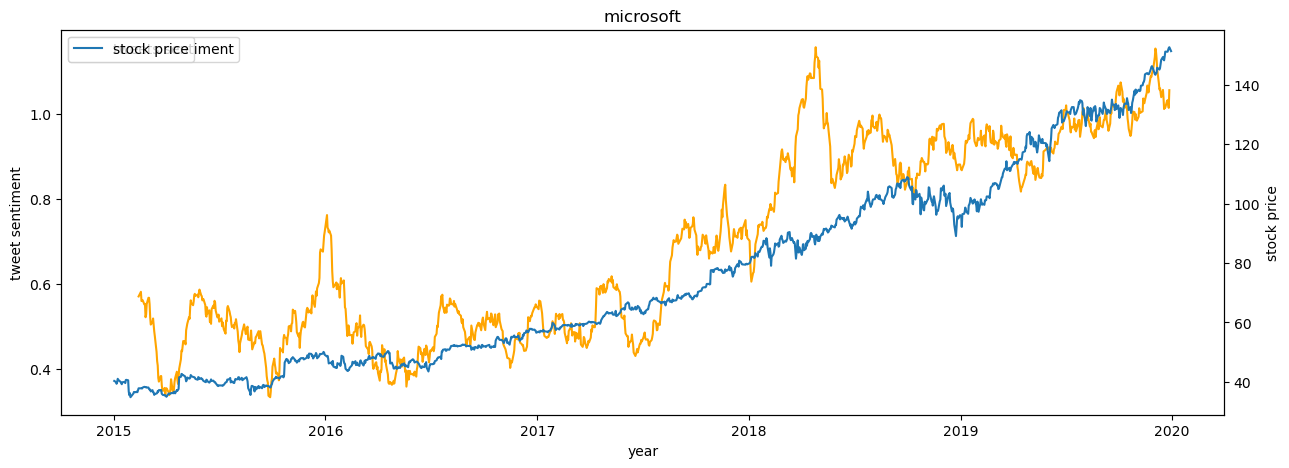

In [81]:
sentiment_overtime(msft_ml,msft_stock,'microsoft')

there is a relationship between the sentiment of the tweets to the share price of the company 